In [1]:
#!/usr/bin/env python3

# High-Amount Fraud Detection Based on Client Behavior


## Cargar el dataset y preparar el entorno


### Librerías + Config inicial


In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

# Mostrar más columnas en outputs
pd.set_option("display.max_columns", 100)

### Cargar dataset


In [3]:
# Ruta del archivo
data_path = "feature_engineering_work/dataset_feature_engineering.csv"

# Cargar el dataset
df = pd.read_csv(data_path)

# Ver las primeras filas
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,4.97,4.97,0.0,0.0,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,107.23,107.23,0.0,0.0,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,220.11,220.11,0.0,0.0,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,45.00,45.00,0.0,0.0,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,41.96,41.96,0.0,0.0,True,77.702395,1,1,0,2019,6,1,1,1


## 2 - Exploratory Data Analysis (EDA)


### 1. Shape, types and basic info


In [4]:
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nResumen de info del dataset:")
df.info()

Dimensiones del dataset: (1852394, 35)

Tipos de datos:
cc_num                               int64
merchant                            object
category                            object
amt                                float64
first                               object
last                                object
gender                              object
street                              object
city                                object
state                               object
zip                                  int64
lat                                float64
long                               float64
city_pop                             int64
job                                 object
dob                                 object
trans_num                           object
unix_time                            int64
merch_lat                          float64
merch_long                         float64
is_fraud                             int64
amt_month                          float6

### 2. Descripción estadística y columnas


In [5]:
print("\nDescripción estadística:")
print(df.describe())

print("\nListado de columnas:")
print(df.columns.tolist())


Descripción estadística:
             cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03   
std    3.014876e+05  1.81

### 3. Valores nulos y duplicados


In [6]:
print("Valores nulos por columna:\n", df.isnull().sum())

print("\nValores únicos por columna:\n", df.nunique())

Valores nulos por columna:
 cc_num                             0
merchant                           0
category                           0
amt                                0
first                              0
last                               0
gender                             0
street                             0
city                               0
state                              0
zip                                0
lat                                0
long                               0
city_pop                           0
job                                0
dob                                0
trans_num                          0
unix_time                          0
merch_lat                          0
merch_long                         0
is_fraud                           0
amt_month                          0
amt_year                           0
amt_month_shopping_net_spend       0
count_month_shopping_net           0
first_time_at_merchant             0
dist_betwe

### 4. Distribución de la variable objetivo (is_fraud)


In [7]:
print(df["is_fraud"].value_counts())

is_fraud
0    1842743
1       9651
Name: count, dtype: int64


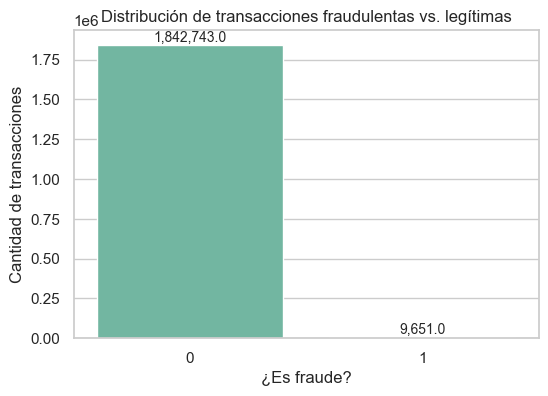

In [8]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="is_fraud", data=df, palette="Set2", order=[0, 1])
plt.title("Distribución de transacciones fraudulentas vs. legítimas")
plt.xlabel("¿Es fraude?")
plt.ylabel("Cantidad de transacciones")

# Agregar los números encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:,}",
        (p.get_x() + p.get_width() / 2.0, height),
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.show()

### 5. Distribución de montos de transacción


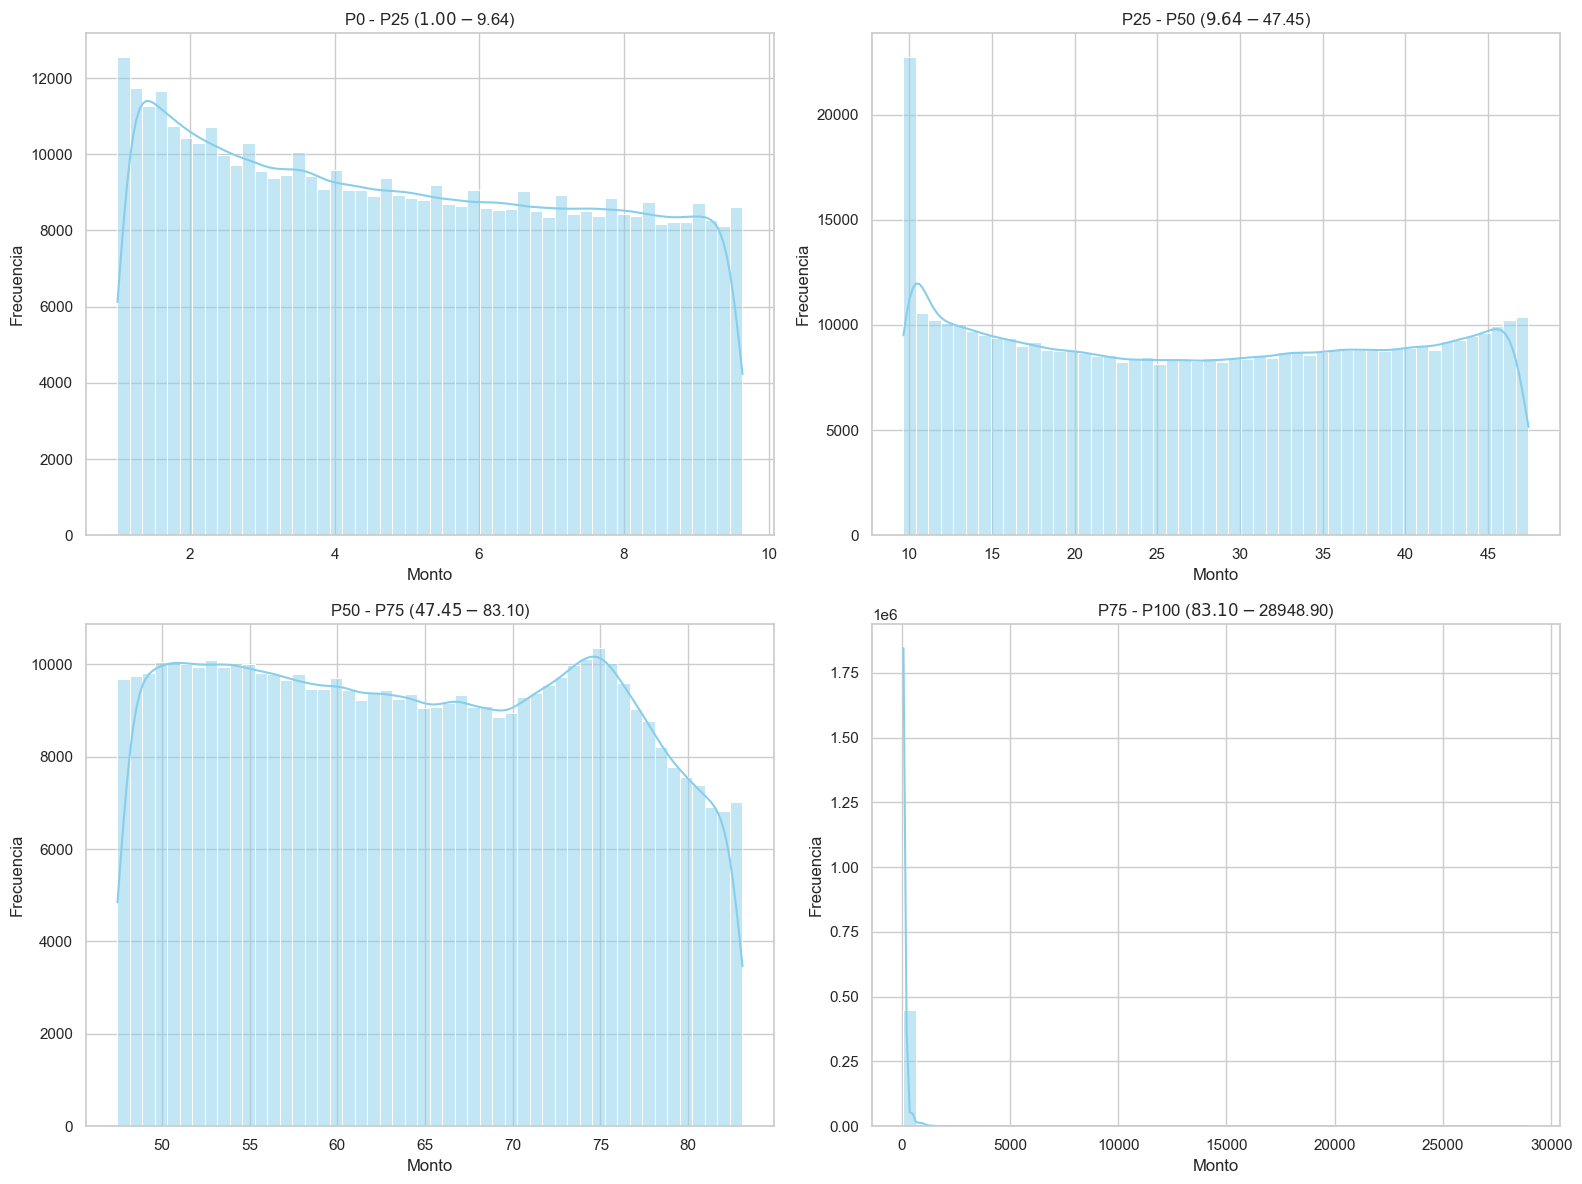

In [9]:
# Calcular los percentiles para dividir en 4 grupos de 25%
p0 = df["amt"].quantile(0.00)
p25 = df["amt"].quantile(0.25)
p50 = df["amt"].quantile(0.50)
p75 = df["amt"].quantile(0.75)
p100 = df["amt"].quantile(1.00)

# Crear los rangos y sus títulos
amt_ranges = [
    (df[(df["amt"] >= p0) & (df["amt"] <= p25)], f"P0 - P25 (${p0:.2f} - ${p25:.2f})"),
    (
        df[(df["amt"] > p25) & (df["amt"] <= p50)],
        f"P25 - P50 (${p25:.2f} - ${p50:.2f})",
    ),
    (
        df[(df["amt"] > p50) & (df["amt"] <= p75)],
        f"P50 - P75 (${p50:.2f} - ${p75:.2f})",
    ),
    (
        df[(df["amt"] > p75) & (df["amt"] <= p100)],
        f"P75 - P100 (${p75:.2f} - ${p100:.2f})",
    ),
]

# Plot
plt.figure(figsize=(16, 12))

for idx, (subset, title) in enumerate(amt_ranges, 1):
    plt.subplot(2, 2, idx)
    sns.histplot(subset["amt"], bins=50, kde=True, color="skyblue")
    plt.title(title)
    plt.xlabel("Monto")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### 6. Relación entre monto y fraude


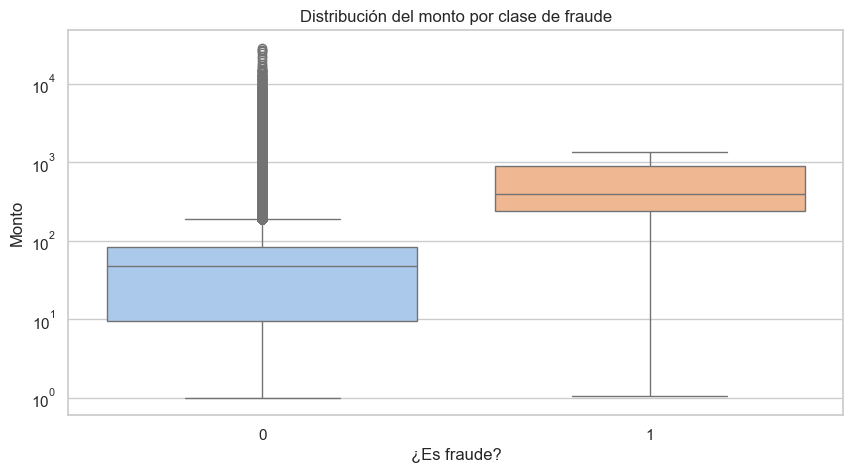

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="is_fraud", y="amt", data=df, palette="pastel")
plt.title("Distribución del monto por clase de fraude")
plt.xlabel("¿Es fraude?")
plt.ylabel("Monto")
plt.yscale("log")  # escala log para manejar outliers
plt.show()

### 7. Correlaciones entre variables numéricas


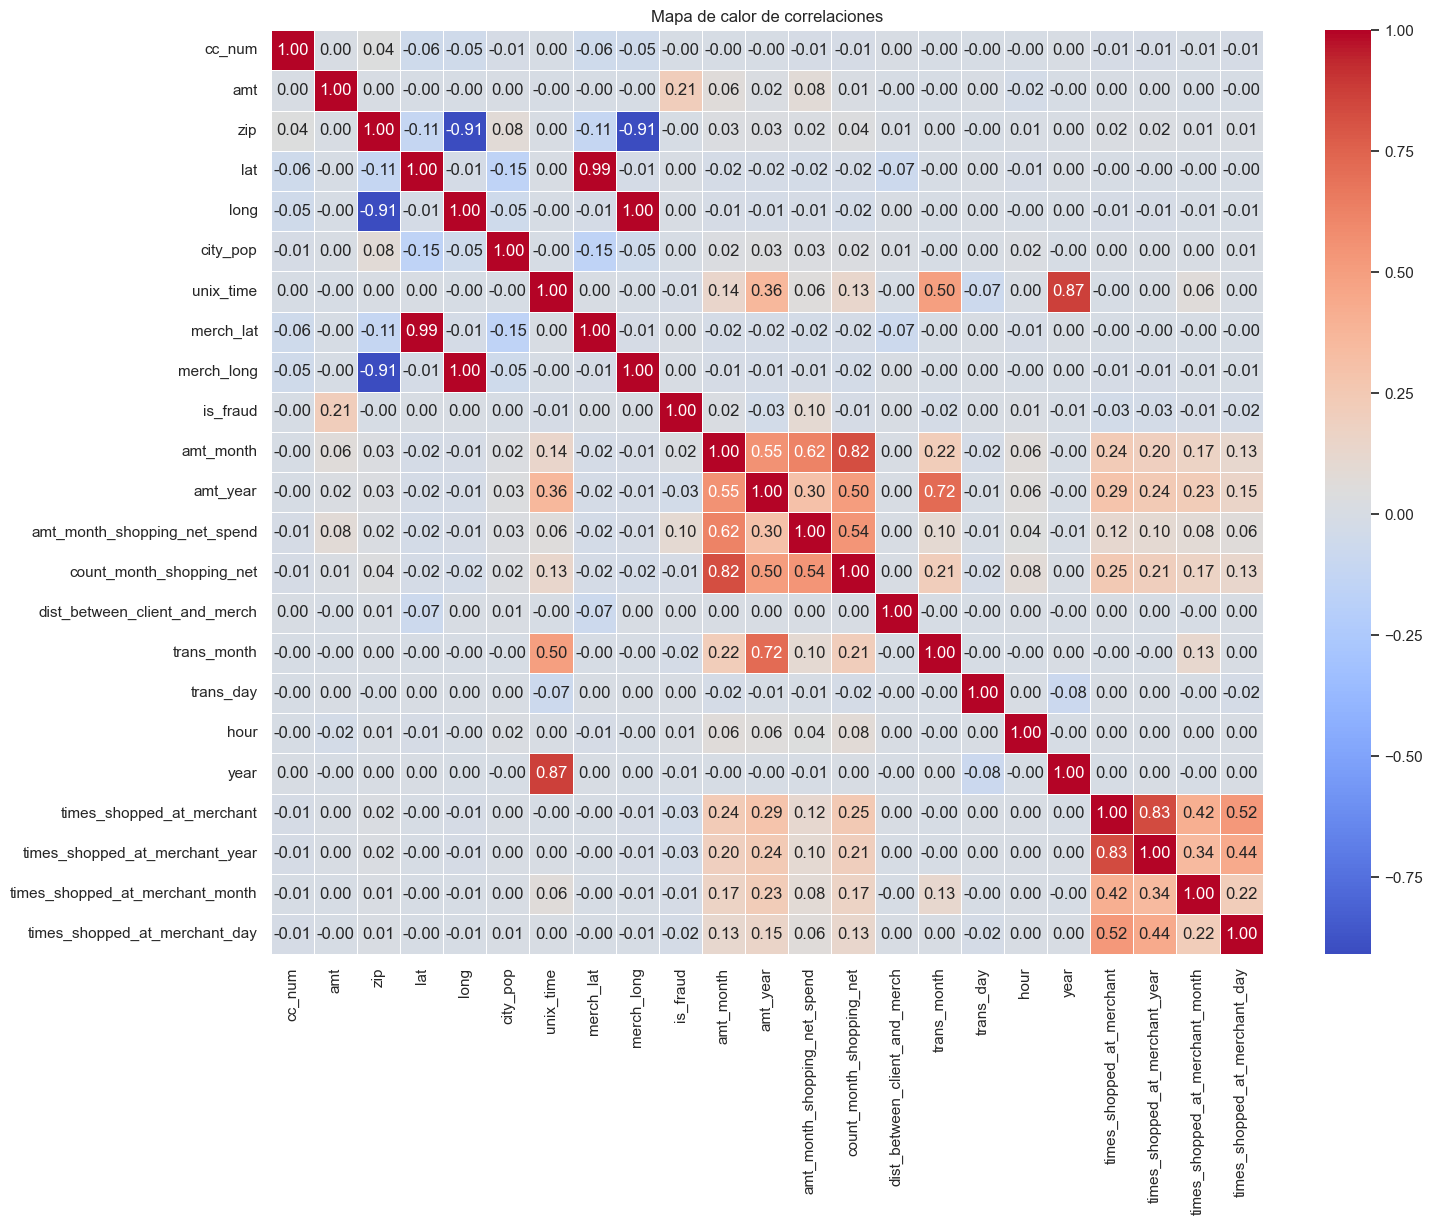

In [11]:
plt.figure(figsize=(16, 12))

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Generar el heatmap con las columnas numéricas
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()

### 8. Análisis por cliente (cc_num)


In [12]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

# Crear columna auxiliar con nombre completo en mayúsculas
df["client_name"] = df["first"].str.upper() + " " + df["last"].str.upper()

# Crear opciones del dropdown: "cc_num - NOMBRE"
client_options = [
    (f"{row.cc_num} - {row.client_name}", row.cc_num)
    for row in df[["cc_num", "client_name"]].drop_duplicates().itertuples(index=False)
]

# Widget Dropdown
client_dropdown = widgets.Dropdown(
    options=client_options, description="Cliente:", disabled=False
)


# Función para mostrar análisis del cliente seleccionado
def analyze_client(cc_num_selected):
    clear_output(wait=True)
    # ❌ No mostrar el dropdown manualmente
    # display(client_dropdown)

    client_df = df[df["cc_num"] == cc_num_selected]

    print(f"🔍 Análisis para cliente: {cc_num_selected}")
    print(f"Nombre: {client_df['client_name'].iloc[0]}")
    print(f"Total de transacciones: {len(client_df)}")
    print(f"Transacciones fraudulentas: {client_df['is_fraud'].sum()}")

    # Estadísticas del monto
    print("\n📊 Estadísticas del monto (amt):")
    print(client_df["amt"].describe())

    # Gráficas para variables numéricas
    numerical_columns = client_df.select_dtypes(include=["int64", "float64"]).columns
    numerical_columns = [col for col in numerical_columns if col != "cc_num"]

    sns.set_style("darkgrid")
    plt.figure(figsize=(14, len(numerical_columns) * 3))

    for idx, feature in enumerate(numerical_columns, 1):
        plt.subplot(len(numerical_columns), 2, idx)
        sns.histplot(client_df[feature], kde=True)
        plt.title(f"{feature} | Skewness: {round(client_df[feature].skew(), 2)}")

    plt.tight_layout()
    plt.show()


# Asociar función al widget
widgets.interact(analyze_client, cc_num_selected=client_dropdown)

interactive(children=(Dropdown(description='Cliente:', options=(('2703186189652095 - JENNIFER BANKS', 27031861…

<function __main__.analyze_client(cc_num_selected)>

In [13]:
import ipywidgets as widgets
import pandas as pd
import plotly.express as px

# Crear opciones para el dropdown: "cc_num - NOMBRE"
client_options = [
    (f"{row.cc_num} - {row.client_name}", row.cc_num)
    for row in df[["cc_num", "client_name"]].drop_duplicates().itertuples(index=False)
]

# Dropdown del cliente
client_dropdown = widgets.Dropdown(
    options=client_options, description="Cliente:", disabled=False
)


# Función para mostrar mapa interactivo
def show_client_map(cc_num_selected):
    # Filtrar transacciones del cliente
    client_df = df[df["cc_num"] == cc_num_selected].copy()

    if client_df.empty:
        print("No hay transacciones para este cliente.")
        return

    # Última ubicación del cliente
    client_lat = client_df["lat"].iloc[0]
    client_lon = client_df["long"].iloc[0]

    # Comercios únicos en los que el cliente ha comprado
    merchants_df = client_df[["merchant", "merch_lat", "merch_long"]].drop_duplicates()
    merchants_df = merchants_df.rename(
        columns={"merch_lat": "lat", "merch_long": "lon"}
    )
    merchants_df["tipo"] = "Comercio"
    merchants_df["tooltip"] = merchants_df["merchant"].apply(lambda m: f"Merchant: {m}")

    # Punto del cliente
    client_point = pd.DataFrame(
        [
            {
                "lat": client_lat,
                "lon": client_lon,
                "merchant": "Cliente",
                "tipo": "Cliente",
                "tooltip": "Ubicación del Cliente",
            }
        ]
    )

    # Unir data
    map_df = pd.concat([merchants_df, client_point], ignore_index=True)

    # Crear mapa interactivo
    fig = px.scatter_mapbox(
        map_df,
        lat="lat",
        lon="lon",
        color="tipo",
        hover_name="tooltip",
        zoom=10,
        center={"lat": client_lat, "lon": client_lon},
        mapbox_style="carto-positron",
        height=500,
    )

    fig.update_layout(title="📍 Ubicaciones del Cliente y Comercios")
    fig.show()


widgets.interact(show_client_map, cc_num_selected=client_dropdown)

interactive(children=(Dropdown(description='Cliente:', options=(('2703186189652095 - JENNIFER BANKS', 27031861…

<function __main__.show_client_map(cc_num_selected)>

In [14]:
import ipywidgets as widgets
from IPython.display import display

# Total de comercios únicos en todo el dataset
total_merchants = df["merchant"].nunique()

# Crear opciones para el dropdown del cliente
client_options = [
    (f"{row.cc_num} - {row.client_name}", row.cc_num)
    for row in df[["cc_num", "client_name"]].drop_duplicates().itertuples(index=False)
]

client_dropdown_merchants = widgets.Dropdown(
    options=client_options, description="Cliente:", disabled=False
)

# Output widget
merchant_output = widgets.Output()


# Función para mostrar el resumen
def merchant_coverage(change):
    with merchant_output:
        merchant_output.clear_output(wait=True)
        cc_num_selected = change["new"]

        # Filtrar transacciones del cliente
        client_df = df[df["cc_num"] == cc_num_selected]

        # Comercios únicos donde ha comprado este cliente
        client_merchants = client_df["merchant"].nunique()
        uncovered_merchants = total_merchants - client_merchants

        print(f"🛒 Comercios únicos en el dataset: {total_merchants}")
        print(
            f"🙋‍♂️ Comercios visitados por el cliente {cc_num_selected}: {client_merchants}"
        )
        print(f"❌ Comercios donde NO ha comprado: {uncovered_merchants}")


# Asociar la función al dropdown
client_dropdown_merchants.observe(merchant_coverage, names="value")

# Mostrar widgets
display(client_dropdown_merchants, merchant_output)

Dropdown(description='Cliente:', options=(('2703186189652095 - JENNIFER BANKS', 2703186189652095), ('630423337…

Output()

### 9. Análisis histórico por comercio (merchant)


In [15]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Asegurar que la columna merchant está en string
df["merchant"] = df["merchant"].astype(str)

# Crear opciones del dropdown
merchant_options = sorted(df["merchant"].unique().tolist())
merchant_dropdown = widgets.Dropdown(
    options=merchant_options, description="Comercio:", disabled=False
)


# Función para analizar un comercio específico
def analyze_merchant(merchant_selected):
    clear_output(wait=True)

    merch_df = df[df["merchant"] == merchant_selected].copy()

    if merch_df.empty:
        print("No hay datos para este comercio.")
        return

    merch_df["trans_month"] = pd.to_numeric(merch_df["trans_month"], errors="coerce")
    merch_df["year"] = pd.to_numeric(merch_df["year"], errors="coerce")

    # Crear columna para agrupar por año y mes
    merch_df["year_month"] = pd.to_datetime(
        dict(year=merch_df.year, month=merch_df.trans_month, day=1)
    )

    # Agregaciones por mes
    monthly_summary = (
        merch_df.groupby("year_month")
        .agg({"amt": ["sum", "mean"], "trans_num": "count"})
        .reset_index()
    )

    monthly_summary.columns = ["year_month", "Total Amt", "Avg Amt", "Trans Count"]
    monthly_summary["year_month_str"] = monthly_summary["year_month"].dt.strftime(
        "%Y-%m"
    )

    # Plot
    fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=False)

    sns.lineplot(
        data=monthly_summary,
        x="year_month",
        y="Total Amt",
        ax=axes[0],
        marker="o",
        color="steelblue",
    )
    axes[0].set_title(f"💰 Total gastado en {merchant_selected} por mes")

    sns.lineplot(
        data=monthly_summary,
        x="year_month",
        y="Avg Amt",
        ax=axes[1],
        marker="o",
        color="seagreen",
    )
    axes[1].set_title("📊 Promedio de gasto por transacción (mensual)")

    sns.barplot(
        data=monthly_summary,
        x="year_month_str",
        y="Trans Count",
        ax=axes[2],
        color="lightcoral",
    )
    axes[2].set_title("🔢 Número de transacciones por mes")
    axes[2].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()


# Asignar función al widget
widgets.interact(analyze_merchant, merchant_selected=merchant_dropdown)

interactive(children=(Dropdown(description='Comercio:', options=('fraud_Abbott-Rogahn', 'fraud_Abbott-Steuber'…

<function __main__.analyze_merchant(merchant_selected)>

### Análisis por código postal (zip)


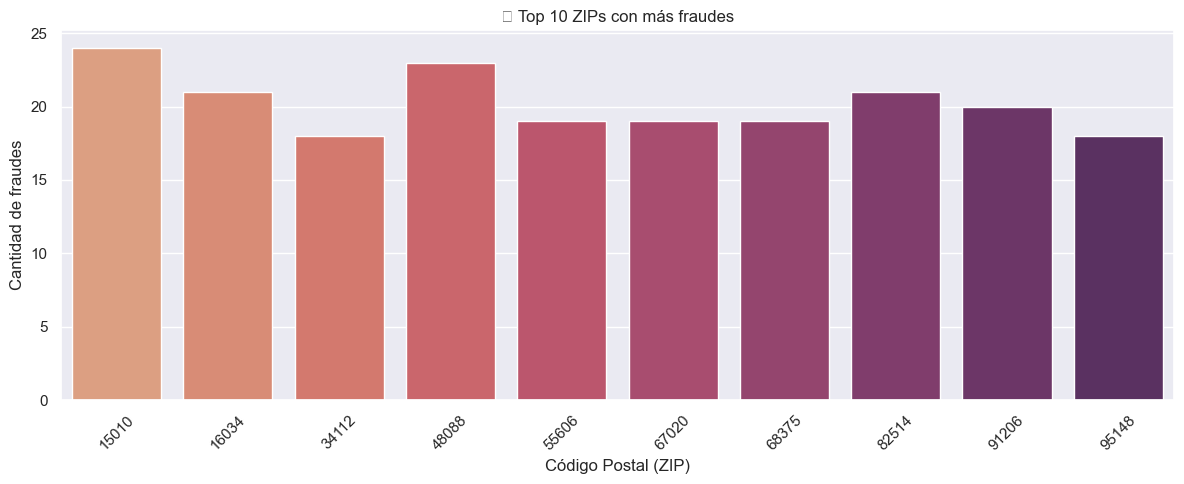

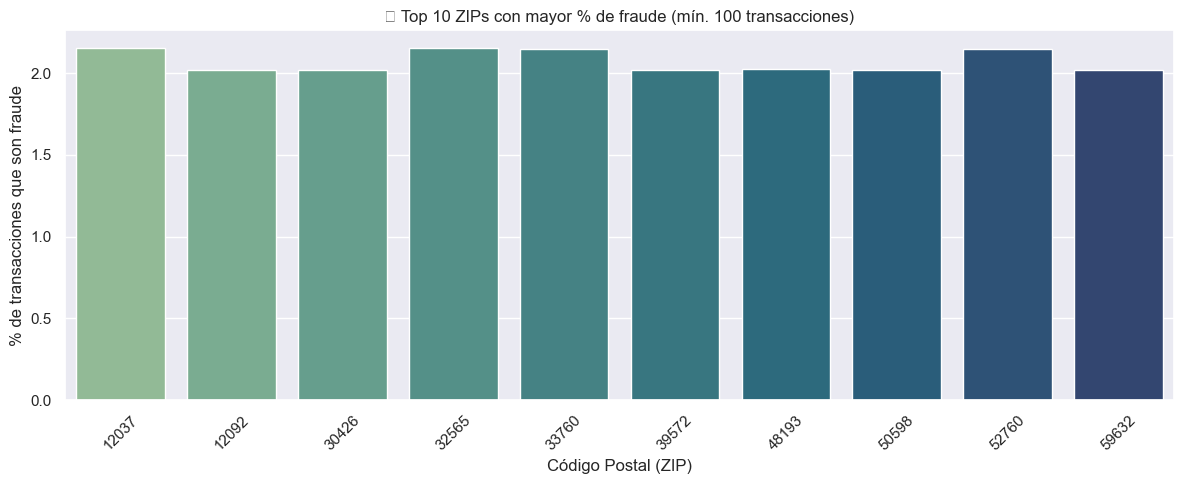

In [16]:
# Agrupar por código postal
zip_summary = (
    df.groupby("zip")
    .agg(total_transacciones=("is_fraud", "count"), fraudes=("is_fraud", "sum"))
    .reset_index()
)

zip_summary["porcentaje_fraude"] = (
    zip_summary["fraudes"] / zip_summary["total_transacciones"]
) * 100

# Ordenar por cantidad de fraudes
top_zip_abs = zip_summary.sort_values("fraudes", ascending=False).head(10)

# ZIPs con al menos 100 transacciones para evitar ruido en % de fraude
top_zip_pct = zip_summary[zip_summary["total_transacciones"] >= 100]
top_zip_pct = top_zip_pct.sort_values("porcentaje_fraude", ascending=False).head(10)

# === Plot 1: ZIPs con más fraudes absolutos ===
plt.figure(figsize=(12, 5))
sns.barplot(x="zip", y="fraudes", data=top_zip_abs, palette="flare")
plt.title("🔒 Top 10 ZIPs con más fraudes")
plt.xlabel("Código Postal (ZIP)")
plt.ylabel("Cantidad de fraudes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === Plot 2: ZIPs con mayor % de fraude (min 100 transacciones) ===
plt.figure(figsize=(12, 5))
sns.barplot(x="zip", y="porcentaje_fraude", data=top_zip_pct, palette="crest")
plt.title("📊 Top 10 ZIPs con mayor % de fraude (mín. 100 transacciones)")
plt.xlabel("Código Postal (ZIP)")
plt.ylabel("% de transacciones que son fraude")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Análisis de montos de transacciones fraudulentas


Total de fraudes: 9651
Monto mínimo: $1.06
Monto máximo: $1376.04
Monto promedio: $530.66


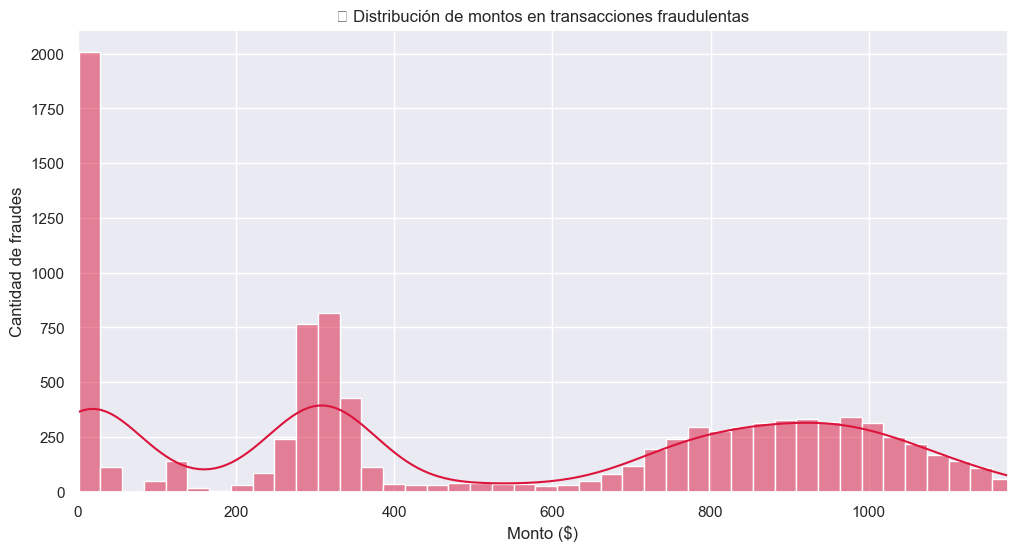

In [17]:
# Filtrar solo las transacciones fraudulentas
fraud_df = df[df["is_fraud"] == 1]

# Ver resumen básico
print(f"Total de fraudes: {len(fraud_df)}")
print(f"Monto mínimo: ${fraud_df['amt'].min():.2f}")
print(f"Monto máximo: ${fraud_df['amt'].max():.2f}")
print(f"Monto promedio: ${fraud_df['amt'].mean():.2f}")

# Histograma de montos fraudulentos
plt.figure(figsize=(12, 6))
sns.histplot(fraud_df["amt"], bins=50, kde=True, color="crimson")
plt.title("💸 Distribución de montos en transacciones fraudulentas")
plt.xlabel("Monto ($)")
plt.ylabel("Cantidad de fraudes")
plt.xlim(
    0, fraud_df["amt"].quantile(0.99)
)  # Limitar a percentil 99 para mejor visualización
plt.grid(True)
plt.show()

## 3 - Limpieza de datos


### 1. Conversión de fechas


In [18]:
# Convertir fecha de nacimiento
df["dob"] = pd.to_datetime(df["dob"], errors="coerce")

# Convertir unix_time a datetime
df["transaction_datetime"] = pd.to_datetime(df["unix_time"], unit="s", errors="coerce")

# Calcular edad al momento de la transacción
df["age_at_transaction"] = df["transaction_datetime"].dt.year - df["dob"].dt.year

# Verificar
print(df[["dob", "transaction_datetime", "age_at_transaction"]].head())

         dob transaction_datetime  age_at_transaction
0 1988-03-09  2012-01-01 00:00:18                  24
1 1978-06-21  2012-01-01 00:00:44                  34
2 1962-01-19  2012-01-01 00:00:51                  50
3 1967-01-12  2012-01-01 00:01:16                  45
4 1986-03-28  2012-01-01 00:03:06                  26


### 2. Conversión de columnas a categoría


In [19]:
categorical_cols = ["merchant", "category", "gender", "state"]

for col in categorical_cols:
    df[col] = df[col].astype("category")

# Verificar tipos
print(df[categorical_cols].dtypes)

merchant    category
category    category
gender      category
state       category
dtype: object


### 3. Variables temporales desde transaction_datetime.


In [20]:
# Día de la semana (0=lunes, 6=domingo)
df["day_of_week"] = df["transaction_datetime"].dt.dayofweek

# Nombre del día (ej. Monday)
df["day_name"] = df["transaction_datetime"].dt.day_name()

# ¿Es fin de semana?
df["is_weekend"] = df["day_of_week"].isin([5, 6])

# ¿Es de noche? (ej. entre 0:00 y 6:00)
df["is_night"] = df["hour"].between(0, 6)

# ¿Es horario comercial típico? (9am a 6pm)
df["is_business_hours"] = df["hour"].between(9, 18)

# Verificamos que se hayan creado correctamente
df[
    [
        "transaction_datetime",
        "hour",
        "day_of_week",
        "day_name",
        "is_weekend",
        "is_night",
        "is_business_hours",
    ]
].head()

,transaction_datetime,hour,day_of_week,day_name,is_weekend,is_night,is_business_hours
0,2012-01-01 00:00:18,0,6,Sunday,True,True,False
1,2012-01-01 00:00:44,0,6,Sunday,True,True,False
2,2012-01-01 00:00:51,0,6,Sunday,True,True,False
3,2012-01-01 00:01:16,0,6,Sunday,True,True,False
4,2012-01-01 00:03:06,0,6,Sunday,True,True,False


#### % de fraudes por día de la semana


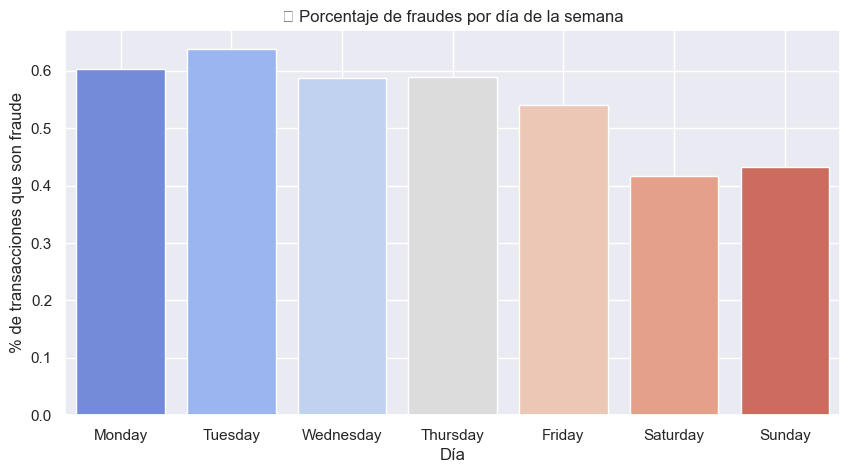

In [21]:
# Agrupar por día y calcular % de fraude
fraude_por_dia = (
    df.groupby("day_name")
    .agg(total=("is_fraud", "count"), fraudes=("is_fraud", "sum"))
    .reset_index()
)
fraude_por_dia["% fraude"] = (fraude_por_dia["fraudes"] / fraude_por_dia["total"]) * 100

# Ordenar por día de la semana
orden_dias = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
fraude_por_dia["day_name"] = pd.Categorical(
    fraude_por_dia["day_name"], categories=orden_dias, ordered=True
)
fraude_por_dia = fraude_por_dia.sort_values("day_name")

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="day_name", y="% fraude", data=fraude_por_dia, palette="coolwarm")
plt.title("📅 Porcentaje de fraudes por día de la semana")
plt.xlabel("Día")
plt.ylabel("% de transacciones que son fraude")
plt.grid(True)
plt.show()

#### % de fraudes en horario nocturno (is_night)


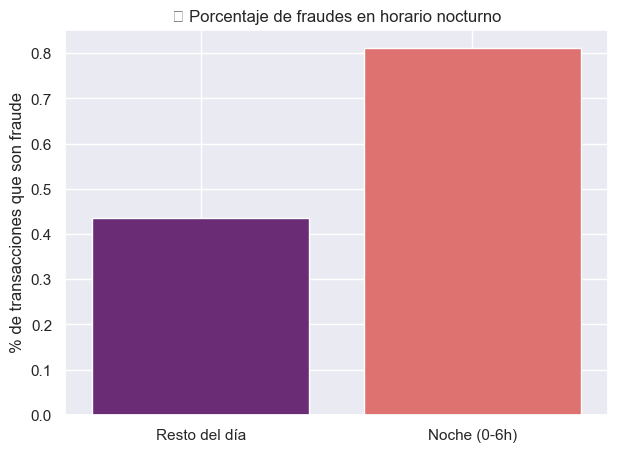

In [22]:
night_stats = (
    df.groupby("is_night")
    .agg(total=("is_fraud", "count"), fraudes=("is_fraud", "sum"))
    .reset_index()
)
night_stats["% fraude"] = (night_stats["fraudes"] / night_stats["total"]) * 100
night_stats["Periodo"] = night_stats["is_night"].map(
    {True: "Noche (0-6h)", False: "Resto del día"}
)

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(x="Periodo", y="% fraude", data=night_stats, palette="magma")
plt.title("🌙 Porcentaje de fraudes en horario nocturno")
plt.xlabel("")
plt.ylabel("% de transacciones que son fraude")
plt.grid(True)
plt.show()

#### % de fraudes en fin de semana vs. días hábiles


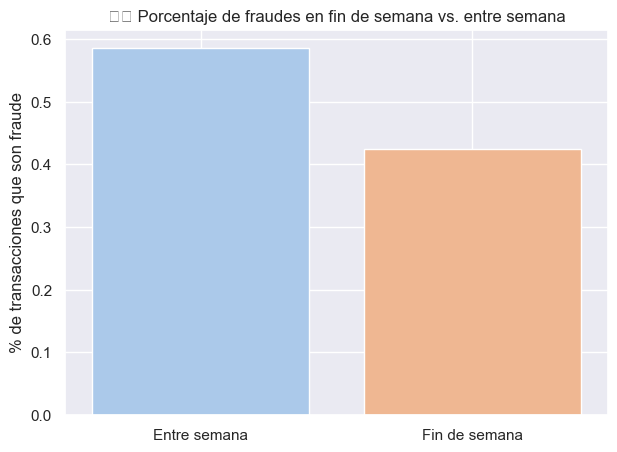

In [23]:
weekend_stats = (
    df.groupby("is_weekend")
    .agg(total=("is_fraud", "count"), fraudes=("is_fraud", "sum"))
    .reset_index()
)
weekend_stats["% fraude"] = (weekend_stats["fraudes"] / weekend_stats["total"]) * 100
weekend_stats["Día"] = weekend_stats["is_weekend"].map(
    {True: "Fin de semana", False: "Entre semana"}
)

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(x="Día", y="% fraude", data=weekend_stats, palette="pastel")
plt.title("🗓️ Porcentaje de fraudes en fin de semana vs. entre semana")
plt.xlabel("")
plt.ylabel("% de transacciones que son fraude")
plt.grid(True)
plt.show()

### 4. Otras recomendaciones


In [24]:
# Strip de espacios en blanco
df["category"] = df["category"].str.strip()

In [25]:
# Verificar si hay duplicados por trans_num
print("Duplicados por transacción:", df["trans_num"].duplicated().sum())

Duplicados por transacción: 0


## 4. Ingeniería de Características (Feature Engineering)


### 1. Z-score del monto respecto al historial del cliente


In [26]:
# Calcular media y std por cliente
cliente_stats = df.groupby("cc_num")["amt"].agg(["mean", "std"]).reset_index()
cliente_stats = cliente_stats.rename(
    columns={"mean": "client_amt_mean", "std": "client_amt_std"}
)

# Unir con el dataframe original
df = df.merge(cliente_stats, on="cc_num", how="left")

# Calcular Z-score por cliente
df["amt_zscore_client"] = (df["amt"] - df["client_amt_mean"]) / df["client_amt_std"]

# Revisar ejemplo
df[["cc_num", "amt", "client_amt_mean", "client_amt_std", "amt_zscore_client"]].head()

,cc_num,amt,client_amt_mean,client_amt_std,amt_zscore_client
0,2703186189652095,4.97,89.408743,127.530101,-0.662108
1,630423337322,107.23,56.078113,159.201852,0.321302
2,38859492057661,220.11,69.924272,116.688602,1.287064
3,3534093764340240,45.00,80.090040,280.077880,-0.125287
4,375534208663984,41.96,95.341146,94.322842,-0.565941


### 2 – Usar first_time_at_merchant como feature de riesgo

¿El fraude ocurre más cuando es la primera vez en un comercio?


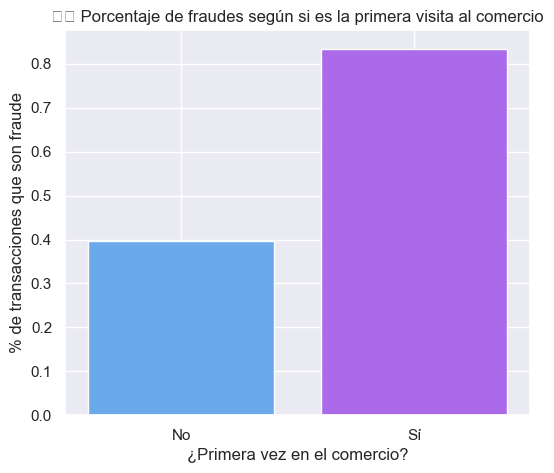

In [27]:
merchant_visit_stats = (
    df.groupby("first_time_at_merchant")
    .agg(total=("is_fraud", "count"), fraudes=("is_fraud", "sum"))
    .reset_index()
)
merchant_visit_stats["% fraude"] = (
    merchant_visit_stats["fraudes"] / merchant_visit_stats["total"]
) * 100
merchant_visit_stats["Primera vez"] = merchant_visit_stats[
    "first_time_at_merchant"
].map({True: "Sí", False: "No"})

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x="Primera vez", y="% fraude", data=merchant_visit_stats, palette="cool")
plt.title("🛍️ Porcentaje de fraudes según si es la primera visita al comercio")
plt.xlabel("¿Primera vez en el comercio?")
plt.ylabel("% de transacciones que son fraude")
plt.grid(True)
plt.show()

## 5. Preparación para modelado


### 5.1 Separar features numéricos y categóricos


In [28]:
# Lista de variables a excluir
vars_excluir = [
    "is_fraud",
    "trans_num",
    "transaction_datetime",
    "first",
    "last",
    "client_name",
    "dob",
]

# Variables numéricas
numeric_features = (
    df.select_dtypes(include=["int64", "float64"])
    .drop(columns=vars_excluir, errors="ignore")
    .columns.tolist()
)

# Variables categóricas
categorical_features = (
    df.select_dtypes(include=["category", "object", "bool"])
    .drop(columns=vars_excluir, errors="ignore")
    .columns.tolist()
)

print("🔢 Variables numéricas:", numeric_features)
print("\n🔤 Variables categóricas:", categorical_features)

🔢 Variables numéricas: ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'amt_month', 'amt_year', 'amt_month_shopping_net_spend', 'count_month_shopping_net', 'dist_between_client_and_merch', 'trans_month', 'trans_day', 'hour', 'year', 'times_shopped_at_merchant', 'times_shopped_at_merchant_year', 'times_shopped_at_merchant_month', 'times_shopped_at_merchant_day', 'client_amt_mean', 'client_amt_std', 'amt_zscore_client']

🔤 Variables categóricas: ['merchant', 'category', 'gender', 'street', 'city', 'state', 'job', 'first_time_at_merchant', 'day_name', 'is_weekend', 'is_night', 'is_business_hours']


### 5.2 Normalización / Transformación de variables numéricas


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()

df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

print("✅ Escalado completo de variables numéricas")

✅ Escalado completo de variables numéricas


### 5.3 Codificación de variables categóricas


In [30]:
# Codificar variables categóricas usando One-Hot Encoding o Label Encoding
from sklearn.preprocessing import LabelEncoder

df_encoded = df_scaled.copy()

# Encoding simple (Label Encoding) para LightGBM (que puede manejarlo directamente)
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

print("🔠 Variables categóricas codificadas con LabelEncoder")

🔠 Variables categóricas codificadas con LabelEncoder


## 6. Modelo base con LightGBM


### 6.1 Separación en conjunto de entrenamiento y prueba


In [31]:
from sklearn.model_selection import train_test_split

# Split temporal: entrenamiento antes del último trimestre del último año, prueba en último trimestre
target = "is_fraud"
features = numeric_features + categorical_features

# Determinar el último año válido y definir meses del último trimestre
df_encoded["year"] = df_encoded["transaction_datetime"].dt.year
df_encoded["month"] = df_encoded["transaction_datetime"].dt.month
last_year = df_encoded["year"].max()

# Conjunto de entrenamiento: todos los datos antes de octubre del último año
train_df = df_encoded[
    ~((df_encoded["year"] == last_year) & (df_encoded["month"] >= 10))
]

# Conjunto de prueba: último trimestre (octubre–diciembre) del último año
test_df = df_encoded[(df_encoded["year"] == last_year) & (df_encoded["month"] >= 10)]

# Undersampling del 30% solo en no fraudes del conjunto de entrenamiento
fraud_train = train_df[train_df[target] == 1]
nonfraud_train = train_df[train_df[target] == 0].sample(frac=0.3, random_state=42)
train_balanced = pd.concat([fraud_train, nonfraud_train])

# Definir X_train, y_train, X_test, y_test
X_train = train_balanced[features]
y_train = train_balanced[target]
X_test = test_df[features]
y_test = test_df[target]

print("✅ División temporal completada")
print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")

✅ División temporal completada
Entrenamiento: (477362, 37), Prueba: (281521, 37)


### 6.2 Entrenamiento de modelo base con métricas estándar


In [32]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

model = LGBMClassifier(
    objective="binary",
    boosting_type="gbdt",
    n_estimators=1000,
    scale_pos_weight=20,  # (y == 0).sum() / (y == 1).sum(),
    random_state=42,
)

model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="auc",
    callbacks=[early_stopping(stopping_rounds=50), log_evaluation(period=100)],
)

[LightGBM] [Info] Number of positive: 8715, number of negative: 468647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5303
[LightGBM] [Info] Number of data points in the train set: 477362, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984804
[LightGBM] [Info] Start training from score -3.984804
Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.99765	valid_0's binary_logloss: 0.0127123
Early stopping, best iteration is:
[66]	valid_0's auc: 0.997795	valid_0's binary_logloss: 0.0187803


LGBMClassifier(n_estimators=1000, objective='binary', random_state=42,
               scale_pos_weight=20)

In [33]:
from sklearn.metrics import f1_score, roc_auc_score

print("🔍 Exploración de scale_pos_weight y threshold...")

for spw in [20, 50, 100, 150, 200]:
    model = LGBMClassifier(
        objective="binary", n_estimators=1000, scale_pos_weight=spw, random_state=42
    )

    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="auc")

    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades de fraude
    y_pred_label = (y_pred_prob > 0.3).astype(
        int
    )  # Umbral ajustado (puedes probar 0.2, 0.4...)

    auc = roc_auc_score(y_test, y_pred_prob)
    f1 = f1_score(y_test, y_pred_label)

    print(f"SPW={spw:<3} | AUC: {auc:.4f} | F1: {f1:.4f}")

🔍 Exploración de scale_pos_weight y threshold...
[LightGBM] [Info] Number of positive: 8715, number of negative: 468647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5303
[LightGBM] [Info] Number of data points in the train set: 477362, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984804
[LightGBM] [Info] Start training from score -3.984804
SPW=20  | AUC: 0.9956 | F1: 0.8541
[LightGBM] [Info] Number of positive: 8715, number of negative: 468647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5303
[LightGBM] [Info] Number o

### 6.3 Evaluación con métricas estándar


In [34]:
# Predicción
y_pred_prob = model.predict(X_test)
y_pred_label = (y_pred_prob > 0.5).astype(int)

# Métricas
auc = roc_auc_score(y_test, y_pred_prob)
f1 = f1_score(y_test, y_pred_label)

print(f"🔍 AUC: {auc:.4f}")
print(f"🎯 F1-Score: {f1:.4f}")

🔍 AUC: 0.8935
🎯 F1-Score: 0.8356


#### Métricas


In [35]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
)

print("📋 Classification Report:")
print(classification_report(y_test, y_pred_label))

print("🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_label))

print("🎯 Precision:", precision_score(y_test, y_pred_label))
print("📈 Recall:", recall_score(y_test, y_pred_label))

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    280585
           1       0.89      0.79      0.84       936

    accuracy                           1.00    281521
   macro avg       0.94      0.89      0.92    281521
weighted avg       1.00      1.00      1.00    281521

🧮 Confusion Matrix:
[[280494     91]
 [   199    737]]
🎯 Precision: 0.8900966183574879
📈 Recall: 0.7873931623931624


### 6.4 Exploración interactiva de SPW y Threshold con widgets


In [36]:
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

# Slider para threshold
threshold_slider = widgets.FloatSlider(
    value=0.3,
    min=0.1,
    max=0.9,
    step=0.05,
    description="Threshold:",
    continuous_update=False,
)

# Dropdown para scale_pos_weight
spw_dropdown = widgets.Dropdown(
    options=[20, 50, 100, 150, 200],
    value=20,
    description="SPW:",
    disabled=False,
)

output_metrics = widgets.Output()


def update_metrics(threshold, spw):
    clear_output(wait=True)
    display(threshold_slider, spw_dropdown, output_metrics)

    model = LGBMClassifier(
        objective="binary",
        boosting_type="gbdt",
        n_estimators=1000,
        scale_pos_weight=spw,
        random_state=42,
    )

    # === Undersampling ===
    train_df = X_train.copy()
    train_df["is_fraud"] = y_train

    # Separar fraudes y no fraudes
    fraud_df = train_df[train_df["is_fraud"] == 1]
    nonfraud_df = train_df[train_df["is_fraud"] == 0]

    # Tomar solo el 30% de los no fraudes
    nonfraud_sampled = nonfraud_df.sample(frac=0.3, random_state=42)

    # Unir y barajar
    undersampled_df = pd.concat([fraud_df, nonfraud_sampled]).sample(
        frac=1, random_state=42
    )

    # Separar features y target
    X_train_bal = undersampled_df.drop("is_fraud", axis=1)
    y_train_bal = undersampled_df["is_fraud"]

    # === Entrenar modelo ===
    model.fit(X_train_bal, y_train_bal)

    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_pred_label = (y_pred_prob > threshold).astype(int)

    auc = roc_auc_score(y_test, y_pred_prob)
    f1 = f1_score(y_test, y_pred_label)
    prec = precision_score(y_test, y_pred_label)
    rec = recall_score(y_test, y_pred_label)

    print(f"🧪 Resultados con Threshold = {threshold:.2f} y SPW = {spw}")
    print(f"🔍 AUC       : {auc:.4f}")
    print(f"🎯 F1-Score  : {f1:.4f}")
    print(f"✅ Precision : {prec:.4f}")
    print(f"📈 Recall    : {rec:.4f}")

    # Mensaje interpretativo
    if rec > 0.85 and prec < 0.4:
        print(
            "\n⚠️ Estás capturando casi todos los fraudes, pero con muchos falsos positivos."
        )
    elif rec > 0.6 and prec > 0.6:
        print("\n✅ Buen balance entre precisión y recall.")
    elif prec > 0.85 and rec < 0.5:
        print("\n🎯 Alta precisión, pero estás dejando pasar muchos fraudes.")
    else:
        print("\nℹ️ Revisa si el balance se ajusta a tus prioridades.")


# Mostrar los widgets y activar función
widgets.interact(update_metrics, threshold=threshold_slider, spw=spw_dropdown)

interactive(children=(FloatSlider(value=0.3, continuous_update=False, description='Threshold:', max=0.9, min=0…

<function __main__.update_metrics(threshold, spw)>

In [37]:
# División extra para validación interna
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

## 7. Funciones feval personalizadas


### 7.1 Penalización por falsos positivos


In [38]:
def feval_fp_penalty(y_pred, data):
    y_true = data.get_label()
    y_pred_label = (y_pred > 0.5).astype(int)

    tp = ((y_true == 1) & (y_pred_label == 1)).sum()
    fp = ((y_true == 0) & (y_pred_label == 1)).sum()

    if tp == 0:
        score = float("inf")  # evita división por cero
    else:
        score = (tp + fp) / tp  # razón FP por cada TP (fraude detectado)

    return "fp_penalty", score, False  # False: cuanto menor, mejor

### 7.2 Ponderación por monto anómalo


In [39]:
def feval_amt_weighted_error(y_pred, data):
    y_true = data.get_label()
    df_eval = data.data  # features originales

    # Obtener montos (deben estar en los datos de evaluación)
    amt = df_eval[:, df.columns.get_loc("amt")]

    y_pred_label = (y_pred > 0.5).astype(int)

    # Penalización por falsos positivos, ponderada por monto
    weighted_fp = np.sum((y_true == 0) & (y_pred_label == 1) * amt)
    weighted_tp = np.sum((y_true == 1) & (y_pred_label == 1) * amt)

    if weighted_tp == 0:
        score = float("inf")
    else:
        score = (weighted_tp + weighted_fp) / weighted_tp

    return "amt_weighted_fp", score, False

### 7.3 Métrica balanceada entre precisión y recall


In [40]:
from sklearn.metrics import precision_score, recall_score


def feval_balanced_metric(y_pred, data):
    y_true = data.get_label()
    y_pred_label = (y_pred > 0.5).astype(int)

    precision = precision_score(y_true, y_pred_label)
    recall = recall_score(y_true, y_pred_label)

    score = 2 * (precision * recall) / (precision + recall + 1e-8)  # F1 modificado
    return "balanced_f1", score, True  # True: cuanto mayor, mejor

## 8. Optimización de Hiperparámetros


### 8.1 Definir función objetivo para Optuna con LightGBM


In [41]:
import optuna
from lightgbm import LGBMClassifier, early_stopping
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Usamos un subconjunto para acelerar la búsqueda
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)


def objective(trial):
    params = {
        "objective": "binary",
        "boosting_type": "gbdt",
        "metric": "auc",
        "n_estimators": 1000,
        "random_state": 42,
        "scale_pos_weight": trial.suggest_int("scale_pos_weight", 10, 200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "num_leaves": trial.suggest_int("num_leaves", 20, 100),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 100),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
    }

    model = LGBMClassifier(**params)
    model.fit(
        X_train_sub,
        y_train_sub,
        eval_set=[(X_valid, y_valid)],
        callbacks=[early_stopping(stopping_rounds=50)],
    )

    y_pred = model.predict_proba(X_valid)[:, 1]
    return roc_auc_score(y_valid, y_pred)  # Se puede cambiar a f1_score si se desea

### 8.2 Ejecutar la optimización con Optuna


In [42]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # Aumentar trials para más precisión

print("✅ Optimización completada")
print("🧪 Mejor score (AUC):", study.best_value)
print("🔧 Mejores hiperparámetros:", study.best_params)

[I 2025-05-27 13:01:42,108] A new study created in memory with name: no-name-4058d628-3698-41d8-b9d4-50efccd02ebe


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:02:03,582] Trial 0 finished with value: 0.9994676974958712 and parameters: {'scale_pos_weight': 165, 'learning_rate': 0.06137675996764808, 'num_leaves': 100, 'min_child_samples': 93, 'subsample': 0.9909897729476862, 'colsample_bytree': 0.8351080977319946, 'reg_alpha': 2.244439484146585, 'reg_lambda': 0.5977122585073524}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[987]	valid_0's auc: 0.999413


[I 2025-05-27 13:02:37,680] Trial 1 finished with value: 0.9994128776158422 and parameters: {'scale_pos_weight': 140, 'learning_rate': 0.019688028933728875, 'num_leaves': 87, 'min_child_samples': 73, 'subsample': 0.6977224754533771, 'colsample_bytree': 0.7708676437299664, 'reg_alpha': 4.971623787302439, 'reg_lambda': 3.7805274641268216}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:02:49,856] Trial 2 finished with value: 0.9991835351342729 and parameters: {'scale_pos_weight': 181, 'learning_rate': 0.1349773507991653, 'num_leaves': 62, 'min_child_samples': 62, 'subsample': 0.9352500734836406, 'colsample_bytree': 0.650682916113447, 'reg_alpha': 3.697798914228727, 'reg_lambda': 3.338663132675813}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[944]	valid_0's auc: 0.999447


[I 2025-05-27 13:03:26,096] Trial 3 finished with value: 0.9994466105723897 and parameters: {'scale_pos_weight': 159, 'learning_rate': 0.03257090415597787, 'num_leaves': 97, 'min_child_samples': 73, 'subsample': 0.9636738495241175, 'colsample_bytree': 0.9661632826834595, 'reg_alpha': 3.6423074407574827, 'reg_lambda': 4.47752503500913}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[441]	valid_0's auc: 0.999373


[I 2025-05-27 13:03:34,708] Trial 4 finished with value: 0.9993732745984472 and parameters: {'scale_pos_weight': 97, 'learning_rate': 0.10967715195946398, 'num_leaves': 32, 'min_child_samples': 46, 'subsample': 0.6937760676924039, 'colsample_bytree': 0.7126723790759002, 'reg_alpha': 1.7306311824687666, 'reg_lambda': 4.620147955291104}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.999374


[I 2025-05-27 13:03:56,413] Trial 5 finished with value: 0.9993743518984567 and parameters: {'scale_pos_weight': 117, 'learning_rate': 0.020084405837232363, 'num_leaves': 44, 'min_child_samples': 70, 'subsample': 0.9951137556112004, 'colsample_bytree': 0.8353996397565268, 'reg_alpha': 3.244610999787316, 'reg_lambda': 1.650839716673655}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[266]	valid_0's auc: 0.999337


[I 2025-05-27 13:04:03,681] Trial 6 finished with value: 0.9993367382134656 and parameters: {'scale_pos_weight': 22, 'learning_rate': 0.134676840018831, 'num_leaves': 48, 'min_child_samples': 63, 'subsample': 0.9256065277243252, 'colsample_bytree': 0.6238791842448739, 'reg_alpha': 0.23271217631062158, 'reg_lambda': 1.075085910390703}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[309]	valid_0's auc: 0.999317


[I 2025-05-27 13:04:10,851] Trial 7 finished with value: 0.9993172366348844 and parameters: {'scale_pos_weight': 16, 'learning_rate': 0.13861157704598898, 'num_leaves': 39, 'min_child_samples': 72, 'subsample': 0.9382934302673555, 'colsample_bytree': 0.7003498571074306, 'reg_alpha': 2.506434543284943, 'reg_lambda': 1.8376968207327589}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[367]	valid_0's auc: 0.999442


[I 2025-05-27 13:04:25,443] Trial 8 finished with value: 0.9994415668496179 and parameters: {'scale_pos_weight': 57, 'learning_rate': 0.041701428548835545, 'num_leaves': 91, 'min_child_samples': 94, 'subsample': 0.8855909360086963, 'colsample_bytree': 0.7137033877972887, 'reg_alpha': 4.187728879022528, 'reg_lambda': 0.43518278920289644}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[770]	valid_0's auc: 0.999309


[I 2025-05-27 13:04:36,160] Trial 9 finished with value: 0.9993093160314056 and parameters: {'scale_pos_weight': 43, 'learning_rate': 0.08813987934749165, 'num_leaves': 20, 'min_child_samples': 61, 'subsample': 0.807804856187484, 'colsample_bytree': 0.7580523520693191, 'reg_alpha': 1.5938978792613745, 'reg_lambda': 0.80046183515249}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:04:47,315] Trial 10 finished with value: 0.9926136210263008 and parameters: {'scale_pos_weight': 193, 'learning_rate': 0.1855012614294303, 'num_leaves': 72, 'min_child_samples': 13, 'subsample': 0.7822583501083181, 'colsample_bytree': 0.8732866091461464, 'reg_alpha': 0.16983178723081416, 'reg_lambda': 0.0759816886649749}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[230]	valid_0's auc: 0.999304


[I 2025-05-27 13:04:57,872] Trial 11 finished with value: 0.9993040519518136 and parameters: {'scale_pos_weight': 160, 'learning_rate': 0.061742319213181455, 'num_leaves': 99, 'min_child_samples': 98, 'subsample': 0.8438439645452747, 'colsample_bytree': 0.9410959989558191, 'reg_alpha': 2.6493826100890265, 'reg_lambda': 2.927495252163048}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[408]	valid_0's auc: 0.999273


[I 2025-05-27 13:05:12,439] Trial 12 finished with value: 0.9992728469776747 and parameters: {'scale_pos_weight': 151, 'learning_rate': 0.0716565561486575, 'num_leaves': 78, 'min_child_samples': 85, 'subsample': 0.999856673328049, 'colsample_bytree': 0.9731900528691525, 'reg_alpha': 2.128671957532041, 'reg_lambda': 4.965786257921572}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[525]	valid_0's auc: 0.999429


[I 2025-05-27 13:05:33,281] Trial 13 finished with value: 0.9994286514915494 and parameters: {'scale_pos_weight': 110, 'learning_rate': 0.04669903398565832, 'num_leaves': 97, 'min_child_samples': 41, 'subsample': 0.6186713054248323, 'colsample_bytree': 0.9046070007059999, 'reg_alpha': 1.1606269843869157, 'reg_lambda': 2.073495110367287}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[999]	valid_0's auc: 0.999251


[I 2025-05-27 13:06:04,135] Trial 14 finished with value: 0.9992512152831656 and parameters: {'scale_pos_weight': 172, 'learning_rate': 0.013054440235035436, 'num_leaves': 74, 'min_child_samples': 84, 'subsample': 0.8845679750254127, 'colsample_bytree': 0.9987901669687497, 'reg_alpha': 4.114229528198529, 'reg_lambda': 4.129927870785466}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[178]	valid_0's auc: 0.999172


[I 2025-05-27 13:06:11,931] Trial 15 finished with value: 0.9991724009938338 and parameters: {'scale_pos_weight': 132, 'learning_rate': 0.09647285085940951, 'num_leaves': 82, 'min_child_samples': 85, 'subsample': 0.9716268136291023, 'colsample_bytree': 0.8330376061884374, 'reg_alpha': 3.101737537074512, 'reg_lambda': 2.5981292465088712}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[379]	valid_0's auc: 0.9993


[I 2025-05-27 13:06:23,558] Trial 16 finished with value: 0.9992996203313199 and parameters: {'scale_pos_weight': 84, 'learning_rate': 0.05516410155759842, 'num_leaves': 61, 'min_child_samples': 48, 'subsample': 0.884184654762864, 'colsample_bytree': 0.905226823214337, 'reg_alpha': 4.994850434597064, 'reg_lambda': 3.300666573831948}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[338]	valid_0's auc: 0.99928


[I 2025-05-27 13:06:37,153] Trial 17 finished with value: 0.9992798677908047 and parameters: {'scale_pos_weight': 197, 'learning_rate': 0.0775000129949556, 'num_leaves': 91, 'min_child_samples': 33, 'subsample': 0.9557025372247816, 'colsample_bytree': 0.8248052491675194, 'reg_alpha': 0.818054770065666, 'reg_lambda': 1.2688318307460151}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[790]	valid_0's auc: 0.999348


[I 2025-05-27 13:07:09,708] Trial 18 finished with value: 0.9993482151311804 and parameters: {'scale_pos_weight': 165, 'learning_rate': 0.035176763045675324, 'num_leaves': 99, 'min_child_samples': 92, 'subsample': 0.7612389055078802, 'colsample_bytree': 0.9366021236128672, 'reg_alpha': 2.9985093380371133, 'reg_lambda': 2.326566559392469}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[259]	valid_0's auc: 0.999063


[I 2025-05-27 13:07:20,417] Trial 19 finished with value: 0.9990630060746867 and parameters: {'scale_pos_weight': 128, 'learning_rate': 0.11281664227724289, 'num_leaves': 84, 'min_child_samples': 78, 'subsample': 0.8435468569988384, 'colsample_bytree': 0.8762095410689531, 'reg_alpha': 3.669755965541835, 'reg_lambda': 4.354937617740904}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:07:31,911] Trial 20 finished with value: 0.9990257106828802 and parameters: {'scale_pos_weight': 85, 'learning_rate': 0.17634615870734918, 'num_leaves': 65, 'min_child_samples': 27, 'subsample': 0.9150808081319457, 'colsample_bytree': 0.7697808528834912, 'reg_alpha': 2.094107063881591, 'reg_lambda': 3.6068331676839382}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[413]	valid_0's auc: 0.999462


[I 2025-05-27 13:07:48,372] Trial 21 finished with value: 0.9994624701424161 and parameters: {'scale_pos_weight': 56, 'learning_rate': 0.03694190489506476, 'num_leaves': 89, 'min_child_samples': 100, 'subsample': 0.8886857249474105, 'colsample_bytree': 0.71084661377475, 'reg_alpha': 4.271325561192948, 'reg_lambda': 0.010973529018753259}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[643]	valid_0's auc: 0.999455


[I 2025-05-27 13:08:13,902] Trial 22 finished with value: 0.9994546842014383 and parameters: {'scale_pos_weight': 61, 'learning_rate': 0.03415921581852631, 'num_leaves': 92, 'min_child_samples': 97, 'subsample': 0.9712720636842366, 'colsample_bytree': 0.6730463104363452, 'reg_alpha': 4.395481968632815, 'reg_lambda': 0.10503864311929706}. Best is trial 0 with value: 0.9994676974958712.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:08:30,552] Trial 23 finished with value: 0.999499520693311 and parameters: {'scale_pos_weight': 56, 'learning_rate': 0.0650503810352705, 'num_leaves': 91, 'min_child_samples': 100, 'subsample': 0.9089660269089593, 'colsample_bytree': 0.6626756543732837, 'reg_alpha': 4.339794657576015, 'reg_lambda': 0.16032493712049184}. Best is trial 23 with value: 0.999499520693311.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:08:48,000] Trial 24 finished with value: 0.999529746303805 and parameters: {'scale_pos_weight': 38, 'learning_rate': 0.0661041504107476, 'num_leaves': 69, 'min_child_samples': 100, 'subsample': 0.8454883082231234, 'colsample_bytree': 0.6049864542036381, 'reg_alpha': 4.554013917893311, 'reg_lambda': 0.6269337915090039}. Best is trial 24 with value: 0.999529746303805.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[349]	valid_0's auc: 0.999449


[I 2025-05-27 13:08:59,990] Trial 25 finished with value: 0.9994492120070717 and parameters: {'scale_pos_weight': 45, 'learning_rate': 0.06953757709339714, 'num_leaves': 69, 'min_child_samples': 89, 'subsample': 0.8420320816175754, 'colsample_bytree': 0.600933400813318, 'reg_alpha': 2.820075070633603, 'reg_lambda': 0.8064823005651416}. Best is trial 24 with value: 0.999529746303805.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[215]	valid_0's auc: 0.999246


[I 2025-05-27 13:09:09,224] Trial 26 finished with value: 0.9992464837325556 and parameters: {'scale_pos_weight': 29, 'learning_rate': 0.08595051586657772, 'num_leaves': 54, 'min_child_samples': 100, 'subsample': 0.8037631225235111, 'colsample_bytree': 0.6424204131295687, 'reg_alpha': 4.626725988759859, 'reg_lambda': 0.503275783367207}. Best is trial 24 with value: 0.999529746303805.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:09:38,975] Trial 27 finished with value: 0.9994730533908048 and parameters: {'scale_pos_weight': 78, 'learning_rate': 0.0576444147067645, 'num_leaves': 79, 'min_child_samples': 81, 'subsample': 0.9055499995432127, 'colsample_bytree': 0.6787402254414194, 'reg_alpha': 3.496033858971797, 'reg_lambda': 1.380524922110095}. Best is trial 24 with value: 0.999529746303805.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[246]	valid_0's auc: 0.999285


[I 2025-05-27 13:09:50,690] Trial 28 finished with value: 0.9992852420488068 and parameters: {'scale_pos_weight': 74, 'learning_rate': 0.11810381505475206, 'num_leaves': 79, 'min_child_samples': 81, 'subsample': 0.7433751631412426, 'colsample_bytree': 0.6019177302195821, 'reg_alpha': 3.8659682382806735, 'reg_lambda': 1.4236121400994326}. Best is trial 24 with value: 0.999529746303805.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[364]	valid_0's auc: 0.999462


[I 2025-05-27 13:10:03,172] Trial 29 finished with value: 0.9994615703520672 and parameters: {'scale_pos_weight': 34, 'learning_rate': 0.05380606119484121, 'num_leaves': 68, 'min_child_samples': 91, 'subsample': 0.8592660297978051, 'colsample_bytree': 0.663767866355654, 'reg_alpha': 3.367194234723412, 'reg_lambda': 1.0426925890662015}. Best is trial 24 with value: 0.999529746303805.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:10:19,816] Trial 30 finished with value: 0.9994311366267985 and parameters: {'scale_pos_weight': 10, 'learning_rate': 0.06202886687354756, 'num_leaves': 75, 'min_child_samples': 89, 'subsample': 0.9076737854736354, 'colsample_bytree': 0.7470293278878923, 'reg_alpha': 4.5478813609682645, 'reg_lambda': 0.3982231309066898}. Best is trial 24 with value: 0.999529746303805.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:10:34,672] Trial 31 finished with value: 0.9995161576332307 and parameters: {'scale_pos_weight': 76, 'learning_rate': 0.07889633315346842, 'num_leaves': 87, 'min_child_samples': 80, 'subsample': 0.825841699014447, 'colsample_bytree': 0.7914460996160173, 'reg_alpha': 3.9976231807985614, 'reg_lambda': 0.7421401187448566}. Best is trial 24 with value: 0.999529746303805.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[332]	valid_0's auc: 0.999392


[I 2025-05-27 13:10:47,780] Trial 32 finished with value: 0.9993919375969073 and parameters: {'scale_pos_weight': 71, 'learning_rate': 0.08227226006310462, 'num_leaves': 85, 'min_child_samples': 80, 'subsample': 0.8211563948410022, 'colsample_bytree': 0.6791798871094051, 'reg_alpha': 4.72376454896292, 'reg_lambda': 0.7892075016054267}. Best is trial 24 with value: 0.999529746303805.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:11:03,266] Trial 33 finished with value: 0.9994815065232658 and parameters: {'scale_pos_weight': 85, 'learning_rate': 0.09595521998089948, 'num_leaves': 80, 'min_child_samples': 67, 'subsample': 0.8613154052355789, 'colsample_bytree': 0.7979930821200919, 'reg_alpha': 3.9848001846027956, 'reg_lambda': 1.496183617046493}. Best is trial 24 with value: 0.999529746303805.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[427]	valid_0's auc: 0.999371


[I 2025-05-27 13:11:15,356] Trial 34 finished with value: 0.9993709914569497 and parameters: {'scale_pos_weight': 96, 'learning_rate': 0.09672225706720118, 'num_leaves': 55, 'min_child_samples': 66, 'subsample': 0.8623589387071358, 'colsample_bytree': 0.7440232746170559, 'reg_alpha': 3.94076553087503, 'reg_lambda': 0.33964173059656894}. Best is trial 24 with value: 0.999529746303805.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:11:26,680] Trial 35 finished with value: 0.9995534530250371 and parameters: {'scale_pos_weight': 66, 'learning_rate': 0.09707559661672568, 'num_leaves': 86, 'min_child_samples': 56, 'subsample': 0.7429671802830728, 'colsample_bytree': 0.8001368866668152, 'reg_alpha': 4.770047735935299, 'reg_lambda': 1.7081692591304714}. Best is trial 35 with value: 0.9995534530250371.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:11:38,490] Trial 36 finished with value: 0.9993716892535468 and parameters: {'scale_pos_weight': 43, 'learning_rate': 0.12463458680991316, 'num_leaves': 93, 'min_child_samples': 76, 'subsample': 0.711978170240512, 'colsample_bytree': 0.7988992215268069, 'reg_alpha': 4.8089298412786174, 'reg_lambda': 1.9654308322875083}. Best is trial 35 with value: 0.9995534530250371.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:11:56,518] Trial 37 finished with value: 0.9994215755892142 and parameters: {'scale_pos_weight': 62, 'learning_rate': 0.07299982316018136, 'num_leaves': 86, 'min_child_samples': 56, 'subsample': 0.6596631259583559, 'colsample_bytree': 0.6327627191316236, 'reg_alpha': 4.420729799163595, 'reg_lambda': 1.0623365082035805}. Best is trial 35 with value: 0.9995534530250371.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:12:05,541] Trial 38 finished with value: 0.9990317215272514 and parameters: {'scale_pos_weight': 99, 'learning_rate': 0.15495717267379439, 'num_leaves': 96, 'min_child_samples': 56, 'subsample': 0.7700501922837687, 'colsample_bytree': 0.8133134541280134, 'reg_alpha': 4.964367064928181, 'reg_lambda': 0.7120946159517434}. Best is trial 35 with value: 0.9995534530250371.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[853]	valid_0's auc: 0.999406


[I 2025-05-27 13:12:35,441] Trial 39 finished with value: 0.9994060587964637 and parameters: {'scale_pos_weight': 47, 'learning_rate': 0.02419051810296323, 'num_leaves': 85, 'min_child_samples': 49, 'subsample': 0.7317329932702475, 'colsample_bytree': 0.8629123376936644, 'reg_alpha': 3.809618712833677, 'reg_lambda': 1.6457971722318407}. Best is trial 35 with value: 0.9995534530250371.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[282]	valid_0's auc: 0.999528


[I 2025-05-27 13:12:44,082] Trial 40 finished with value: 0.9995283139844742 and parameters: {'scale_pos_weight': 31, 'learning_rate': 0.1054937910897162, 'num_leaves': 57, 'min_child_samples': 73, 'subsample': 0.8227536583059997, 'colsample_bytree': 0.7310710765127135, 'reg_alpha': 4.263391223639614, 'reg_lambda': 0.9858864993439866}. Best is trial 35 with value: 0.9995534530250371.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[361]	valid_0's auc: 0.999453


[I 2025-05-27 13:12:54,909] Trial 41 finished with value: 0.9994528968627862 and parameters: {'scale_pos_weight': 38, 'learning_rate': 0.10419115040921055, 'num_leaves': 57, 'min_child_samples': 75, 'subsample': 0.7880632149722225, 'colsample_bytree': 0.7852300276539951, 'reg_alpha': 4.269505469021351, 'reg_lambda': 1.1245959453666794}. Best is trial 35 with value: 0.9995534530250371.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[379]	valid_0's auc: 0.999396


[I 2025-05-27 13:13:05,028] Trial 42 finished with value: 0.9993955490003482 and parameters: {'scale_pos_weight': 26, 'learning_rate': 0.10544947078267988, 'num_leaves': 49, 'min_child_samples': 70, 'subsample': 0.8183452323495627, 'colsample_bytree': 0.7327169793566902, 'reg_alpha': 4.522375210673915, 'reg_lambda': 0.33910935295434325}. Best is trial 35 with value: 0.9995534530250371.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:13:21,848] Trial 43 finished with value: 0.9994581119741958 and parameters: {'scale_pos_weight': 53, 'learning_rate': 0.09128231365675739, 'num_leaves': 38, 'min_child_samples': 60, 'subsample': 0.8274158276345088, 'colsample_bytree': 0.621007113966066, 'reg_alpha': 4.787638284388961, 'reg_lambda': 0.6069771046265808}. Best is trial 35 with value: 0.9995534530250371.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[263]	valid_0's auc: 0.999522


[I 2025-05-27 13:13:30,856] Trial 44 finished with value: 0.9995216481906655 and parameters: {'scale_pos_weight': 68, 'learning_rate': 0.12837888926088334, 'num_leaves': 66, 'min_child_samples': 94, 'subsample': 0.7928463094542963, 'colsample_bytree': 0.728218794327285, 'reg_alpha': 4.073814460775886, 'reg_lambda': 0.9283671786429326}. Best is trial 35 with value: 0.9995534530250371.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:13:42,790] Trial 45 finished with value: 0.9992906407908999 and parameters: {'scale_pos_weight': 67, 'learning_rate': 0.1288573701128108, 'num_leaves': 66, 'min_child_samples': 94, 'subsample': 0.7895084545316429, 'colsample_bytree': 0.7753950058419554, 'reg_alpha': 3.6162255330391546, 'reg_lambda': 1.6921340159339797}. Best is trial 35 with value: 0.9995534530250371.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[206]	valid_0's auc: 0.999285


[I 2025-05-27 13:13:49,798] Trial 46 finished with value: 0.9992850522971004 and parameters: {'scale_pos_weight': 14, 'learning_rate': 0.14784795030806125, 'num_leaves': 60, 'min_child_samples': 87, 'subsample': 0.7508697394136834, 'colsample_bytree': 0.8555080159325673, 'reg_alpha': 3.351651246911719, 'reg_lambda': 0.956373613928522}. Best is trial 35 with value: 0.9995534530250371.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:13:58,392] Trial 47 finished with value: 0.9990748196486545 and parameters: {'scale_pos_weight': 21, 'learning_rate': 0.1617062675935173, 'num_leaves': 74, 'min_child_samples': 73, 'subsample': 0.6772274640391405, 'colsample_bytree': 0.694033470884746, 'reg_alpha': 4.118907501267562, 'reg_lambda': 1.2480024958552383}. Best is trial 35 with value: 0.9995534530250371.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[397]	valid_0's auc: 0.999247


[I 2025-05-27 13:14:08,870] Trial 48 finished with value: 0.9992469734143782 and parameters: {'scale_pos_weight': 93, 'learning_rate': 0.1179262645114102, 'num_leaves': 49, 'min_child_samples': 95, 'subsample': 0.7150392125359761, 'colsample_bytree': 0.7263320895777379, 'reg_alpha': 4.657731817446035, 'reg_lambda': 2.0059375487407936}. Best is trial 35 with value: 0.9995534530250371.


[LightGBM] [Info] Number of positive: 6972, number of negative: 374917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5300
[LightGBM] [Info] Number of data points in the train set: 381889, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018257 -> initscore=-3.984803
[LightGBM] [Info] Start training from score -3.984803
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

[I 2025-05-27 13:14:20,322] Trial 49 finished with value: 0.9994144384766512 and parameters: {'scale_pos_weight': 113, 'learning_rate': 0.14053052564640522, 'num_leaves': 70, 'min_child_samples': 41, 'subsample': 0.7782861052234759, 'colsample_bytree': 0.7543390747947045, 'reg_alpha': 4.12068026364336, 'reg_lambda': 2.2619821617858777}. Best is trial 35 with value: 0.9995534530250371.


✅ Optimización completada
🧪 Mejor score (AUC): 0.9995534530250371
🔧 Mejores hiperparámetros: {'scale_pos_weight': 66, 'learning_rate': 0.09707559661672568, 'num_leaves': 86, 'min_child_samples': 56, 'subsample': 0.7429671802830728, 'colsample_bytree': 0.8001368866668152, 'reg_alpha': 4.770047735935299, 'reg_lambda': 1.7081692591304714}


### 9. Evaluación de Resultados

#### 9.1 Matriz de confusión

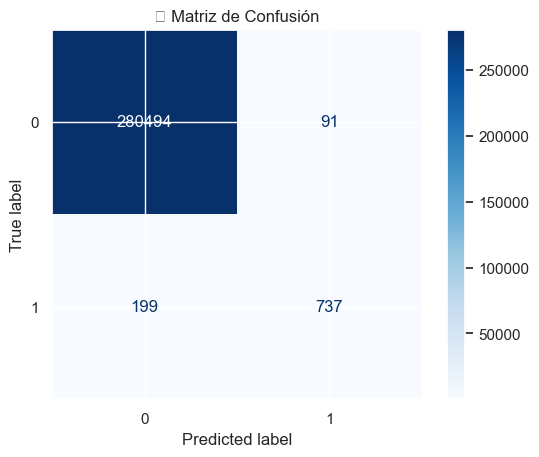

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicción final sobre X_test
y_pred = model.predict(X_test)

# Calcular y mostrar matriz
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("🔲 Matriz de Confusión")
plt.show()

#### 9.2 Curva ROC

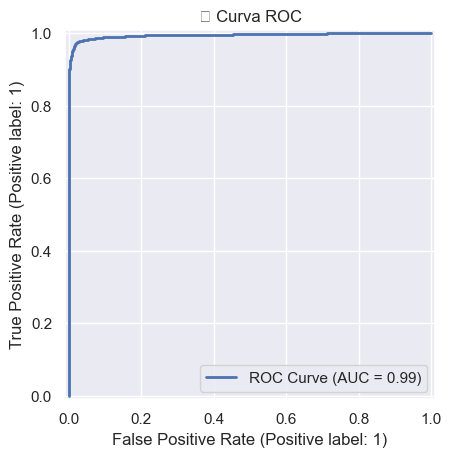

In [44]:
from sklearn.metrics import RocCurveDisplay

# Probabilidades de clase positiva
y_prob = model.predict_proba(X_test)[:, 1]

# ROC
roc_disp = RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    name="ROC Curve",
    lw=2
)
plt.title("📈 Curva ROC")
plt.show()

#### 9.3 Curva Precision-Recall

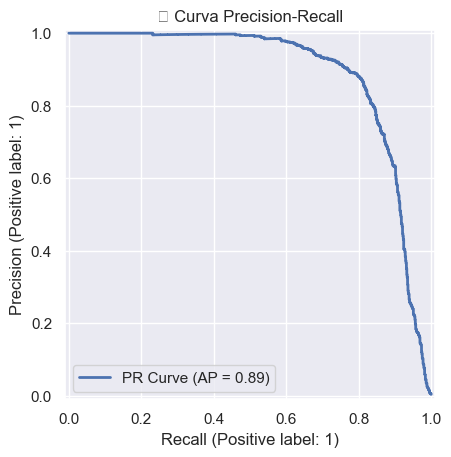

In [46]:
from sklearn.metrics import PrecisionRecallDisplay

# Precision-Recall
pr_disp = PrecisionRecallDisplay.from_predictions(
    y_test,
    y_prob,
    name="PR Curve",
    lw=2
)
plt.title("📊 Curva Precision-Recall")
plt.show()

#### 9.4 Comparación de métricas clave

In [47]:
from sklearn.metrics import precision_score, recall_score

prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
fp   = cm[0,1]  # falsos positivos: fila 0 (no fraude), columna 1 (predicho fraude)

print(f"✅ Precision     : {prec:.4f}")
print(f"📈 Recall        : {rec:.4f}")
print(f"⚠️ Falsos Positivos: {fp}")

✅ Precision     : 0.8901
📈 Recall        : 0.7874
⚠️ Falsos Positivos: 91


## 10. Selección final y justificación

In [48]:
# Obtener monto de test desde test_df
amt_test = test_df["amt"].values

# Predicciones
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob > 0.5).astype(int)

# 1) Penalización por falsos positivos
tp = ((y_test == 1) & (y_pred == 1)).sum()
fp = ((y_test == 0) & (y_pred == 1)).sum()
fp_penalty = (tp + fp) / tp if tp > 0 else float("inf")

# 2) Ponderación por monto anómalo
weighted_fp = np.sum(((y_test == 0) & (y_pred == 1)) * amt_test)
weighted_tp = np.sum(((y_test == 1) & (y_pred == 1)) * amt_test)
amt_weighted_fp = (
    (weighted_tp + weighted_fp) / weighted_tp if weighted_tp > 0 else float("inf")
)

# 3) Métrica balanceada (F1 modificado)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
balanced_f1 = 2 * (precision * recall) / (precision + recall + 1e-8)

# Mostrar resultados de métricas personalizadas
print("🔍 Métricas personalizadas en el set de prueba:")
print(f"• fp_penalty      : {fp_penalty:.4f}")
print(f"• amt_weighted_fp : {amt_weighted_fp:.4f}")
print(f"• balanced_f1     : {balanced_f1:.4f}")

# Justificación de la selección
print("\n📝 Justificación:")
print(
    "La métrica 'balanced_f1' ofrece el mejor equilibrio entre precisión y recall, por lo que se elige como métrica final personalizada."
)


🔍 Métricas personalizadas en el set de prueba:
• fp_penalty      : 1.1235
• amt_weighted_fp : 1.1545
• balanced_f1     : 0.8356

📝 Justificación:
La métrica 'balanced_f1' ofrece el mejor equilibrio entre precisión y recall, por lo que se elige como métrica final personalizada.
